# This notebook is to use CmapPy to query LINCS1000

In [2]:
import sys
sys.path.append("../..")
import pandas as pd
import matplotlib.pyplot as plt
from sys import platform 
%matplotlib inline
%load_ext autoreload
%autoreload 2
prefix = 'G:' if platform == 'win32' else '/Volumes/GoogleDrive'

In [3]:
sig_info = pd.read_csv(prefix + "/Shared drives/NIAAA_ASSIST/Data/LINCS L1000 (from GEO)/Phase I/GSE92742_Broad_LINCS_sig_info.txt.gz", 
                       sep="\t", low_memory = False)

In [4]:
# look at the metadata fields provided 
sig_info.columns

Index(['sig_id', 'pert_id', 'pert_iname', 'pert_type', 'cell_id', 'pert_dose',
       'pert_dose_unit', 'pert_idose', 'pert_time', 'pert_time_unit',
       'pert_itime', 'distil_id'],
      dtype='object')

In [5]:
# unique cell types
sig_info.cell_id.unique()

array(['CD34', 'HL60', 'PC3', 'U937', 'MCF7', 'A375', 'HEK293T', 'A549',
       'ASC', 'HA1E', 'HCC515', 'HEKTE', 'HEPG2', 'HT29', 'NCIH716',
       'NPC', 'SHSY5Y', 'SKL', 'SW480', 'VCAP', 'BT20', 'FIBRNPC',
       'HS578T', 'MCF10A', 'MCH58', 'MDAMB231', 'NEU', 'NKDBA', 'NOMO1',
       'PHH', 'SKBR3', 'SKB', 'SKM1', 'THP1', 'A673', 'AGS', 'CL34',
       'CORL23', 'COV644', 'DV90', 'EFO27', 'H1299', 'HCC15', 'HCT116',
       'HEC108', 'HT115', 'JHUEM2', 'LOVO', 'MDST8', 'NCIH1694',
       'NCIH1836', 'NCIH2073', 'NCIH508', 'NCIH596', 'OV7', 'PL21', 'RKO',
       'RMGI', 'RMUGS', 'SKLU1', 'SKMEL1', 'SKMEL28', 'SNGM', 'SNU1040',
       'SNUC4', 'SNUC5', 'SW620', 'SW948', 'T3M10', 'TYKNU', 'WSUDLCL2',
       'HUH7', 'HS27A', 'JURKAT', 'U266', 'U2OS'], dtype=object)

In [6]:
# info about cell types
cell_info = pd.read_csv(prefix + "/Shared drives/NIAAA_ASSIST/Data/LINCS L1000 (from GEO)/Phase I/GSE92742_Broad_LINCS_cell_info.txt.gz", 
                       sep="\t", low_memory = False)

In [7]:
cell_info['primary_site'].unique()

array(['skin', 'lung', 'bone', 'stomach', 'breast', 'large intestine',
       'ovary', 'kidney', 'endometrium', 'liver',
       'haematopoietic and lymphoid tissue', 'vascular system',
       'prostate', 'autonomic ganglia', 'blood', 'pancreas', '-666',
       'central nervous system', 'adipose', 'muscle'], dtype=object)

In [21]:
neu_ids = cell_info[cell_info['primary_site'].isin(['central nervous system', 'autonomic ganglia'])]['base_cell_id']

In [9]:
# Get gene id 
gene_info = pd.read_csv(prefix + "/Shared drives/NIAAA_ASSIST/Data/LINCS L1000 (from GEO)/Phase I/GSE92742_Broad_LINCS_gene_info.txt.gz", 
                        sep="\t", dtype=str, low_memory = False)
gene_info.columns

Index(['pr_gene_id', 'pr_gene_symbol', 'pr_gene_title', 'pr_is_lm',
       'pr_is_bing'],
      dtype='object')

In [10]:
gene_info.head()

,pr_gene_id,pr_gene_symbol,pr_gene_title,pr_is_lm,pr_is_bing
0,780,DDR1,discoidin domain receptor tyrosine kinase 1,1,1
1,7849,PAX8,paired box 8,1,1
2,2978,GUCA1A,guanylate cyclase activator 1A,0,0
3,2049,EPHB3,EPH receptor B3,0,1
4,2101,ESRRA,estrogen related receptor alpha,0,1


In [83]:
critical_gene_df = pd.read_csv(prefix + '/Shared drives/NIAAA_ASSIST/Data/feature_extraction_derived/epoch=100_alpha=0.1_critical_gene_df.csv')

In [84]:
critical_gene_df

,gene,LR_repeat1,LR_repeat2,LR_repeat3,RF_repeat1,RF_repeat2,RF_repeat3,XGB_repeat1,XGB_repeat2,XGB_repeat3,near_impact_cnt
0,ENSG00000197647,0.0,0.0,3.0,2.0,2.0,2.0,3.0,2.0,3.0,17.0
1,ENSG00000132570,1.0,1.0,2.0,4.0,2.0,2.0,1.0,2.0,1.0,16.0
2,ENSG00000143819,0.0,0.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,15.0
3,ENSG00000157833,0.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,14.0
4,ENSG00000141736,0.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...
824,ENSG00000140807,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
825,ENSG00000183682,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
826,ENSG00000166535,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
827,ENSG00000158796,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [85]:
deseq = pd.read_excel(prefix + '/Shared drives/NIAAA_ASSIST/Data/deseq.alc.vs.control.age.rin.batch.gender.PMI.corrected.w.prot.coding.gene.name.xlsx')

In [87]:
gene_mapping_dict = pd.Series(deseq.gene.values, index = deseq.id.values).to_dict()

In [88]:
critical_gene_df['symbol'] = critical_gene_df['gene'].map(gene_mapping_dict)

In [102]:
gene_to_query_ids = gene_info[gene_info["pr_gene_symbol"].isin(critical_gene_df['symbol'][:10])]['pr_gene_id']

In [12]:
from cmapPy.pandasGEXpress.parse import parse

## Query gene using gene id

In [104]:
%%time
# index is gene ids and columns are test conditions
critical_gene_only_gctoo = parse(prefix + "/Shared drives/NIAAA_ASSIST/Data/LINCS L1000 (from GEO)/Phase I/GSE92742_Broad_LINCS_Level5_COMPZ.MODZ_n473647x12328.gctx", 
                                 rid = gene_to_query_ids)

Wall time: 2min 6s


In [105]:
critical_gene_only_gctoo.data_df.head(2)

cid,CPC005_A375_6H:BRD-A85280935-003-01-7:10,CPC005_A375_6H:BRD-A07824748-001-02-6:10,CPC004_A375_6H:BRD-K20482099-001-01-1:10,CPC005_A375_6H:BRD-K62929068-001-03-3:10,CPC005_A375_6H:BRD-K43405658-001-01-8:10,CPC004_A375_6H:BRD-K03670461-001-02-0:10,CPC004_A375_6H:BRD-K36737713-001-01-6:10,CPC005_A375_6H:BRD-K51223576-001-01-3:10,CPC004_A375_6H:BRD-A14966924-001-03-0:10,CPC004_A375_6H:BRD-K79131256-001-08-8:10,...,PCLB003_PC3_24H:BRD-A52530684-003-01-7:0.04,PCLB003_PC3_24H:BRD-A75409952-001-01-6:10,PCLB003_PC3_24H:BRD-A75409952-001-01-6:3.33,PCLB003_PC3_24H:BRD-A75409952-001-01-6:1.11,PCLB003_PC3_24H:BRD-A75409952-001-01-6:0.37,PCLB003_PC3_24H:BRD-A75409952-001-01-6:0.12,PCLB003_PC3_24H:BRD-A75409952-001-01-6:0.04,PCLB003_PC3_24H:BRD-K42573370-001-01-1:10,PCLB003_PC3_24H:BRD-K53665955-001-01-4:0.04,PCLB003_PC3_24H:BRD-K04466929-001-05-1:10
rid,,,,,,,,,,,,,,,,,,,,,
2064,-0.657700,-2.031781,-2.160964,-0.781153,0.451163,-1.137791,0.336308,0.404125,1.351348,0.6253,...,-0.750883,3.419950,1.709605,1.656000,0.267117,0.543913,-0.158874,2.1820,1.9881,-3.5217
2052,-0.689672,1.372168,4.262742,-0.346629,0.683505,-0.090105,0.490424,-0.235586,-0.288266,-1.4914,...,0.469031,-0.665342,-0.858659,-0.110482,0.176461,0.413879,0.131562,-2.3518,-1.7758,-0.0399


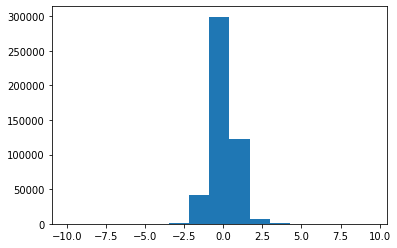

In [106]:
# look at the distribution of a gene for all the tested conditions
plt.hist(critical_gene_only_gctoo.data_df.loc['2052'], bins = 15);

# Get top candidate drugs (1% on each side)

In [ ]:
# sig_info = pd.read_csv(prefix + "/Shared drives/NIAAA_ASSIST/Data/LINCS L1000 (from GEO)/Phase I/GSE92742_Broad_LINCS_sig_info.txt.gz", 
#                        sep="\t", low_memory = False)

## Positively correlated drugs

In [149]:
def pos_pert_by_genes_df(gene_id, gctoo_data, cell_ids, sig_info = sig_info, percent = 0.01):
    positive_num = gctoo_data.data_df.loc[gene_id][gctoo_data.data_df.loc[gene_id] > 0].shape[0]
    top_n = int(percent*positive_num)
    cutoff = gctoo_data.data_df.loc[gene_id].sort_values(ascending = False)[top_n]
    # subset to get only df for that gene with conditions > cutoff
    # sort_values so the index is the rank for the expression values
    pos_df = gctoo_data.data_df.loc[gene_id][gctoo_data.data_df.loc[gene_id] > cutoff].sort_values(ascending = False).reset_index() 
    # test conditions info
    pos_df_w_sig_info = pd.merge(pos_df, sig_info, left_on = 'cid', right_on = 'sig_id')
    specific_cell_only = pos_df_w_sig_info[pos_df_w_sig_info['cell_id'].isin(cell_ids)] # return the df with the cell types of interest only
    specific_cell_only = specific_cell_only.assign(percent = 100*specific_cell_only.index/positive_num)
    return specific_cell_only

In [153]:
pert_df_list = []
for gene in gene_to_query_ids:
    pert_df = pos_pert_by_genes_df(gene, critical_gene_only_gctoo, ['NEU'])
    pert_df_list.append(pert_df)

In [154]:
pert_id_list = [set(pert_df_list[i]['pert_id']) for i in range(len(pert_df_list))]

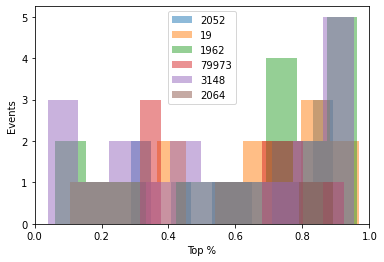

In [158]:
for i, gene in enumerate(gene_to_query_ids):
    plt.hist(pert_df_list[i]['percent'], label = gene, alpha = 0.5)
    plt.legend()
    plt.xlim(0, 1)
plt.xlabel('Top %')
plt.ylabel('Events');

## Negatively correlated drugs

In [163]:
def neg_pert_by_genes_df(gene_id, gctoo_data, cell_ids, sig_info = sig_info, percent = 0.01):
    negative_num = gctoo_data.data_df.loc[gene_id][gctoo_data.data_df.loc[gene_id] < 0].shape[0]
    top_n = int(percent*negative_num)
    cutoff = gctoo_data.data_df.loc[gene_id].sort_values()[top_n]
    # subset to get only df for that gene with conditions > cutoff
    # sort_values so the index is the rank for the expression values
    neg_df = gctoo_data.data_df.loc[gene_id][gctoo_data.data_df.loc[gene_id] < cutoff].sort_values().reset_index() 
    # test conditions info
    neg_df_w_sig_info = pd.merge(neg_df, sig_info, left_on = 'cid', right_on = 'sig_id')
    specific_cell_only = neg_df_w_sig_info[neg_df_w_sig_info['cell_id'].isin(cell_ids)] # return the df with the cell types of interest only
    specific_cell_only = specific_cell_only.assign(percent = 100*specific_cell_only.index/positive_num)
    return specific_cell_only

In [165]:
pert_df_list_down = []
for gene in gene_to_query_ids:
    pert_df = neg_pert_by_genes_df(gene, critical_gene_only_gctoo, ['NEU'])
    pert_df_list_down.append(pert_df)

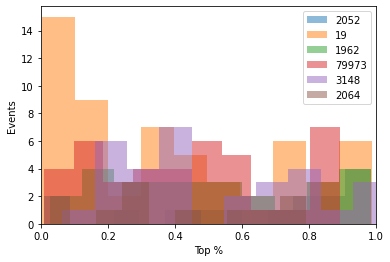

In [166]:
for i, gene in enumerate(gene_to_query_ids):
    plt.hist(pert_df_list_down[i]['percent'], label = gene, alpha = 0.5)
    plt.legend()
    plt.xlim(0, 1)
plt.xlabel('Top %')
plt.ylabel('Events');